# Logistic Regression

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
PATH = '/home/vikas/machine Learning/Tesnor_book/titanic'

In [26]:
# function to read the input
import pandas as pd

def load_housing_data(filename, path = PATH):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [27]:
# laoding the data
train_data = load_housing_data("train.csv")   
test_data = load_housing_data("test.csv")
gen_data = load_housing_data("gender_submission.csv")

In [28]:
# print the shape of the training and testing dataset
print(train_data.shape)
print(test_data.shape)
print(gen_data.shape)

(891, 12)
(418, 11)
(418, 2)


In [29]:
# remove the target label from the training set
train_labels = train_data["Survived"].copy()
train_data = train_data.drop("Survived", axis=1)

The dataset we are going to use is titanic dataset. let's first look how our training set is look like.

In [30]:
train_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [31]:
# library to create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [32]:
pipeline_data_cat = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value='U')),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False)),
])

In [33]:
pipeline_age_fare = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scalar", StandardScaler()),
])

In [34]:
num_attribs = ["Age", "Fare"]
cat_atribs = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

pipeline_full_data = ColumnTransformer([
    ("pipeline_age_fare", pipeline_age_fare, num_attribs),
    ("pipeline_data_cat", pipeline_data_cat, cat_atribs)
],remainder="drop")


In [35]:
print(train_data.shape)
train_data_tranformed = pipeline_full_data.fit_transform(train_data)
print(train_data_tranformed.shape)

(891, 11)
(891, 25)


In [36]:
X = train_data_tranformed # training features after transformation
y = train_labels  # training labels 

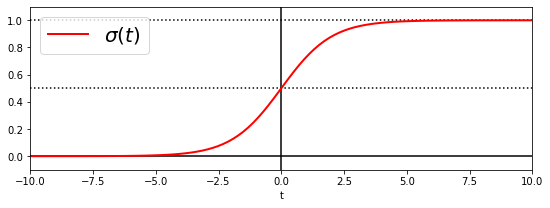

In [37]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "r-", linewidth=2, label=r"$\sigma(t)$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [38]:
class LogisticRegression:
    def __init__(self, n_iter, lr):
        self.n_iter = n_iter  # number of times gradient descent run (hyperparameter)
        self.w = []   # parameters which model will try to learn
        self.lr = lr  # learning rate (hyperparameter)
        
    def sigmoid(self, y_vec, N):
        p = []
        for y in y_vec:
            p.append(1/(1 + np.exp(-1*y)))
        return p
                     
    
    def fit(self, X, y):
        
        w_0 = np.ones(len(X)).reshape(len(X), 1) # to add intercept/bias in the equation
        X = np.concatenate((w_0, X), axis=1) # concatenate so that X contains a value 1 for bias w_0
        
        N, D = X.shape # N - number of samples,  D = Dimension of the features
        
        # initialize w with random values
        self.w = [1] * D
        self.w = [np.random.random() for i in range(D)]
        self.w = np.array(self.w)

        # gradient Descent
        for j in range(self.n_iter):
            y_vec = np.dot(X, self.w.T)
            p = self.sigmoid(y_vec, N)
            
            # calculate error
            error = 0
            for i in range(len(y)):
                error += y[i]*np.log(p[i]) + (i-y[i]) * np.log(1-p[i])
            error = 1/N * error
            print("Error at iteration {} is :- {}".format(j, error))
            
            # calculate the gradient
            grad = 1/N * np.dot((p - y), X)
            
            # updating the previous parameter values
            w_new = self.w - self.lr * grad
            self.w = w_new
            
    def predict(self, X):
        w_0 = np.ones(len(X)).reshape(len(X), 1) # to add intercept/bias in the equation
        X = np.concatenate((w_0, X), axis=1)
        y_vec = np.dot(X, self.w.T)
        N, D = X.shape
        p = self.sigmoid(y_vec, N)
        prediction = []
        
        for i in p:
            if i < 0.5:
                prediction.append(0)
            else:
                prediction.append(1)
        prediction = np.array(prediction)
        return prediction
            
        

let's create a object of LogisticRegression() class and call the fit function

In [40]:
log_reg = LogisticRegression(100, 0.01)
log_reg.fit(X, y)

Error at iteration 0 is :- -1236.7047396753908
Error at iteration 1 is :- -1228.1267250679596
Error at iteration 2 is :- -1219.5863778451321
Error at iteration 3 is :- -1211.0842342240844
Error at iteration 4 is :- -1202.6208294314063
Error at iteration 5 is :- -1194.196697321347
Error at iteration 6 is :- -1185.8123699856562
Error at iteration 7 is :- -1177.4683773554887
Error at iteration 8 is :- -1169.1652467958436
Error at iteration 9 is :- -1160.9035026931524
Error at iteration 10 is :- -1152.6836660365589
Error at iteration 11 is :- -1144.5062539935323
Error at iteration 12 is :- -1136.3717794804986
Error at iteration 13 is :- -1128.2807507291584
Error at iteration 14 is :- -1120.2336708492537
Error at iteration 15 is :- -1112.2310373885398
Error at iteration 16 is :- -1104.2733418907562
Error at iteration 17 is :- -1096.361069452436
Error at iteration 18 is :- -1088.4946982794008
Error at iteration 19 is :- -1080.6746992438354
Error at iteration 20 is :- -1072.9015354427902
Erro

Now, we can call predict function to get predictions.

In [41]:
predict = log_reg.predict(X)
predict.shape

(891,)

In [42]:
# logistic Regression using sklearn library

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)
predict = log_reg.predict(X)